In [1]:
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2
from ipywidgets import interact, interact_manual
import PIL

from tqdm.notebook import tqdm
import os

In [2]:
DATA_PATH = "../data/"
IMAGE_PATHS = sorted(filter(lambda x: x.startswith("urine_"), os.listdir(DATA_PATH)))
WAVELENGHTS = np.linspace(400, 1000, 204)

_false_red_index = 90
false_red = WAVELENGHTS[_false_red_index]
_false_green_index = 48
false_green = WAVELENGHTS[_false_green_index]
_false_blue_index = 24
false_blue = WAVELENGHTS[_false_blue_index]

false_RGB_inds = (_false_red_index,
                  _false_green_index,
                  _false_blue_index)

In [3]:
def read_spec_img(img_path: str):
    spec_path = f"{img_path}/capture/{img_path}.hdr"
    spec_img = envi.open(os.path.join(DATA_PATH, spec_path)).asarray()
#     spec_img = (
#         np.apply_along_axis(lambda x: (x - x.min()) / (x.max() - x.min()), 2, spec_img)
#         * 255
#     ).astype(int)
    
    rgb_path = f"{img_path}/results/RGBBACKGROUND_{img_path}.png"
    rgb_img = cv2.imread(os.path.join(DATA_PATH, rgb_path))[:,:,::-1]
    
    
    return {
        "name": img_path,
        "spec_img": spec_img,
        "rgb_img": rgb_img
    }


def show_spec_img(img_dict):
    spec_img = img_dict["spec_img"]
#     rgb_img = img_dict["rgb_img"]
    false_rgb_img = spec_img.mean(axis=2).T
    
    @interact
    def show(x=(0, 511, 1), y=(0, 511, 1)):
        fig, axes = plt.subplots(1,2,figsize=(24,8))
        axes[0].set(xlabel="Wavelength, nm", ylabel = "Intensity")
        axes[0].plot(WAVELENGHTS, spec_img[x, y, :])
        axes[1].imshow(false_rgb_img)
        axes[1].scatter(x,y,s=40,c='red')

In [4]:
IMAGES = [read_spec_img(img_path) for img_path in tqdm(IMAGE_PATHS)]

  0%|          | 0/6 [00:00<?, ?it/s]

In [5]:
IMG = IMAGES[2]
print("Name :" + IMG["name"])
show_spec_img(IMG)

Name :urine_scat_011


interactive(children=(IntSlider(value=255, description='x', max=511), IntSlider(value=255, description='y', ma…

In [1]:
def draw_circle(event,x,y,flags,param):
    global mouseX,mouseY
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
        mouseX,mouseY = x,y


In [14]:
img = np.zeros((512,512,3), np.uint8)

def on_click(event, x, y, p1, p2):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(lastImage, (x, y), 3, (255, 0, 0), -1)

if __name__ == "__main__":
    cv2.imshow("image", img)
    cv2.namedWindow('image')
    cv2.setMouseCallback('image', on_click)


KeyboardInterrupt: 

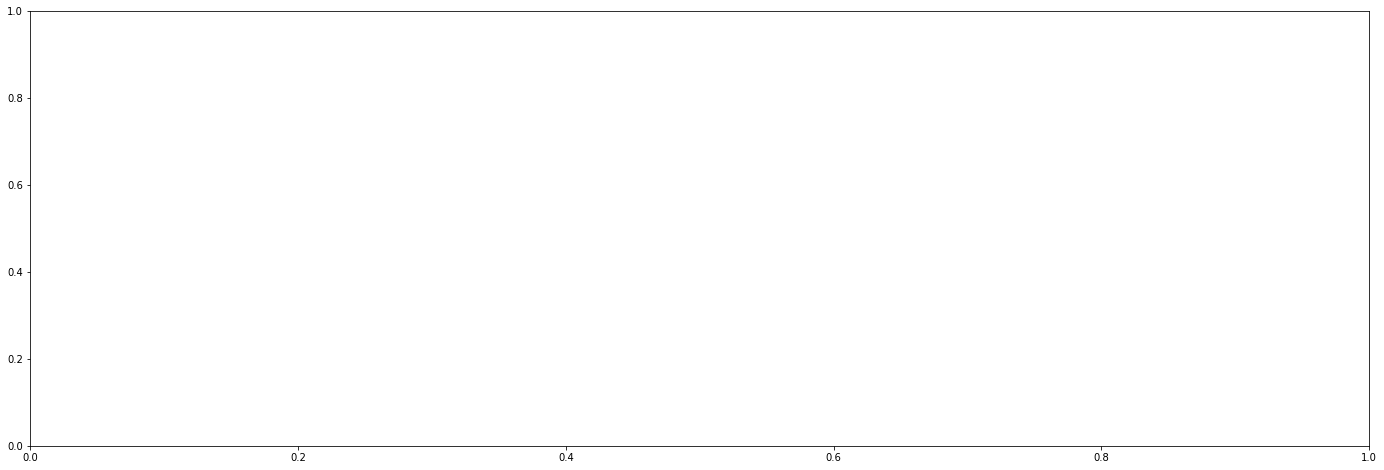

In [10]:
fig, axes = plt.subplots(1,1,figsize=(24,8))
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(20) & 0xFF
    if k == 27:
        break
    elif k == ord('a'):
        print(mouseX,mouseY)

## 

In [6]:

class MousePts:
    def __init__(self,windowname,img):
        self.windowname = windowname
        self.img1 = img.copy()
        self.img = self.img1.copy()
        cv2.namedWindow(windowname,cv2.WINDOW_NORMAL)
        cv2.imshow(windowname,img)
        self.curr_pt = []
        self.point   = []

    def select_point(self,event,x,y,flags,param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.point.append([x,y])
            #print(self.point)
            cv2.circle(self.img,(x,y),5,(0,255,0),-1)
        elif event == cv2.EVENT_MOUSEMOVE:
            self.curr_pt = [x,y]
            #print(self.point)

    def getpt(self,count=1,img=None):
        if img is not None:
            self.img = img
        else:
            self.img = self.img1.copy()
        cv2.namedWindow(self.windowname,cv2.WINDOW_NORMAL)
        cv2.imshow(self.windowname,self.img)
        cv2.setMouseCallback(self.windowname,self.select_point)
        self.point = []
        while(1):
            cv2.imshow(self.windowname,self.img)
            k = cv2.waitKey(20) & 0xFF
            if k == 27 or len(self.point)>=count:
                break
            #print(self.point)
        cv2.setMouseCallback(self.windowname, lambda *args : None)
        #cv2.destroyAllWindows()
        return self.point, self.img

if __name__=='__main__':
    img = IMAGES[2]["spec_img"].mean(axis=2) # np.zeros((512,512,3), np.uint8)
    windowname = 'image'
    coordinateStore = MousePts(windowname,img)

    pts,img = coordinateStore.getpt(3)
    print(pts)

    pts,img = coordinateStore.getpt(3,img)
    print(pts)

    cv2.imshow(windowname,img)
    cv2.waitKey(0)

[[320, 134], [204, 107], [240, 209]]
[[378, 211], [105, 179], [283, 77]]


In [8]:
img = IMAGES[2]["spec_img"].mean(axis=2)

In [10]:
img.shape

(512, 512)